<a href="https://www.kaggle.com/code/handandegerli/customer-life-time-value-calculation?scriptVersionId=179670349" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
############################################
# CUSTOMER LIFETIME VALUE (Müşteri Yaşam Boyu Değeri)
############################################

# 1. Veri Hazırlama
# 2. Average Order Value (average_order_value = total_price / total_transaction)
# 3. Purchase Frequency (total_transaction / total_number_of_customers)
# 4. Repeat Rate & Churn Rate (birden fazla alışveriş yapan müşteri sayısı / tüm müşteriler)
# 5. Profit Margin (profit_margin =  total_price * 0.10)
# 6. Customer Value (customer_value = average_order_value * purchase_frequency)
# 7. Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)
# 8. Segmentlerin Oluşturulması
# 9. BONUS: Tüm İşlemlerin Fonksiyonlaştırılması


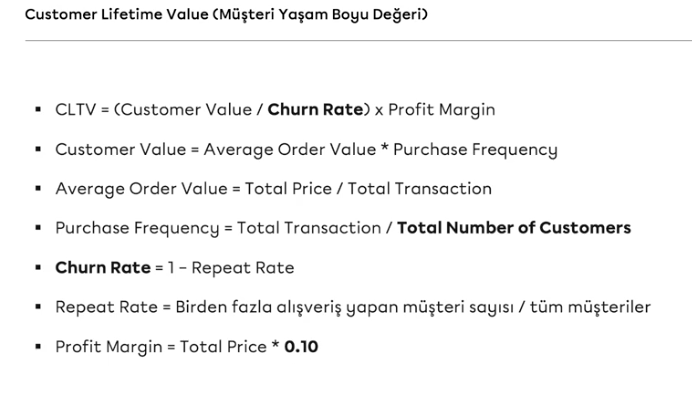

In [2]:
##################################################
# 1. Veri Hazırlama
##################################################

# Veri Seti Hikayesi
# https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

# Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının
# 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

# Değişkenler
# InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. C ile başlıyorsa iptal edilen işlem.
# StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
# Description: Ürün ismi
# Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
# InvoiceDate: Fatura tarihi ve zamanı.
# UnitPrice: Ürün fiyatı (Sterlin cinsinden)
# CustomerID: Eşsiz müşteri numarası
# Country: Ülke ismi. Müşterinin yaşadığı ülke.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df_ = pd.read_excel("/kaggle/input/retaildatasetcltv/online_retail_II.xlsx", sheet_name="Year 2009-2010")


In [4]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df = df[~df["Invoice"].str.contains("C", na=False)]
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,515255.00000,10.95663,-9600.00000,1.00000,3.00000,10.00000,19152.00000,104.35401
InvoiceDate,515255,2010-06-28 17:41:06.558422528,2009-12-01 07:45:00,2010-03-21 13:27:00,2010-07-06 13:13:00,2010-10-15 14:27:00,2010-12-09 20:01:00,NaN
Price,515255.00000,3.95637,-53594.36000,1.25000,2.10000,4.21000,25111.09000,127.68856
Customer ID,407695.00000,15368.50411,12346.00000,13997.00000,15321.00000,16812.00000,18287.00000,1679.79570


In [8]:
#quantity ve price da eksi degerler olamaz filtreleyip dropna yapıyoruz.
df = df[(df['Quantity'] > 0)]
df.dropna(inplace=True)

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,407695.00000,13.58669,1.00000,2.00000,5.00000,12.00000,19152.00000,96.84223
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:46:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407695.00000,3.29419,0.00000,1.25000,1.95000,3.75000,10953.50000,34.75666
Customer ID,407695.00000,15368.50411,12346.00000,13997.00000,15321.00000,16812.00000,18287.00000,1679.79570


In [10]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000


In [12]:
#average_order_value = total_price / total_transaction totalprice ve total transaction yok onları hesaplıcaz.
#quantity öncelik değil bizim için totalprice ve invoice(transac num için) öncelik

cltv_c = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']
cltv_c.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12346.00000,11,70,372.86000
12347.00000,2,828,1323.32000
12348.00000,1,373,222.16000
12349.00000,3,993,2671.14000
12351.00000,1,261,300.93000


In [13]:
##################################################
# 2. Average Order Value (average_order_value = total_price / total_transaction)
##################################################

cltv_c["average_order_value"] = cltv_c["total_price"] / cltv_c["total_transaction"]

cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value
Customer ID,,,,
12346.00000,11,70,372.86000,33.89636
12347.00000,2,828,1323.32000,661.66000
12348.00000,1,373,222.16000,222.16000
12349.00000,3,993,2671.14000,890.38000
12351.00000,1,261,300.93000,300.93000


In [14]:
##################################################
# 3. Purchase Frequency (total_transaction / total_number_of_customers)
##################################################
cltv_c.shape[0]
cltv_c["purchase_frequency"] = cltv_c["total_transaction"] / cltv_c.shape[0]
cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency
Customer ID,,,,,
12346.00000,11,70,372.86000,33.89636,0.00255
12347.00000,2,828,1323.32000,661.66000,0.00046
12348.00000,1,373,222.16000,222.16000,0.00023
12349.00000,3,993,2671.14000,890.38000,0.00070
12351.00000,1,261,300.93000,300.93000,0.00023


In [15]:
##################################################
# 4. Repeat Rate & Churn Rate (birden fazla alışveriş yapan müşteri sayısı / tüm müşteriler)
##################################################

repeat_rate = cltv_c[cltv_c["total_transaction"] > 1].shape[0] / cltv_c.shape[0]

churn_rate = 1 - repeat_rate

print(repeat_rate)
print(churn_rate)


0.6706073249884098
0.3293926750115902


In [16]:
##################################################
# 5. Profit Margin (profit_margin =  total_price * 0.10)
##################################################
#Sabit deger sirket tarafından belirlenen bir degerdir.

cltv_c['profit_margin'] = cltv_c['total_price'] * 0.10

cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin
Customer ID,,,,,,
12346.00000,11,70,372.86000,33.89636,0.00255,37.28600
12347.00000,2,828,1323.32000,661.66000,0.00046,132.33200
12348.00000,1,373,222.16000,222.16000,0.00023,22.21600
12349.00000,3,993,2671.14000,890.38000,0.00070,267.11400
12351.00000,1,261,300.93000,300.93000,0.00023,30.09300


In [17]:
##################################################
# 6. Customer Value (customer_value = average_order_value * purchase_frequency)
##################################################

cltv_c['customer_value'] = cltv_c['average_order_value'] * cltv_c["purchase_frequency"]

cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value
Customer ID,,,,,,,
12346.00000,11,70,372.86000,33.89636,0.00255,37.28600,0.08643
12347.00000,2,828,1323.32000,661.66000,0.00046,132.33200,0.30675
12348.00000,1,373,222.16000,222.16000,0.00023,22.21600,0.05150
12349.00000,3,993,2671.14000,890.38000,0.00070,267.11400,0.61918
12351.00000,1,261,300.93000,300.93000,0.00023,30.09300,0.06976


In [18]:
##################################################
# 7. Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)
##################################################

cltv_c["cltv"] = (cltv_c["customer_value"] / churn_rate) * cltv_c["profit_margin"]

cltv_c.sort_values(by="cltv", ascending=False).head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.00000,89,124216,349164.35000,3923.19494,0.02063,34916.43500,80.93749,8579573.77276
14646.00000,78,170342,248396.50000,3184.57051,0.01808,24839.65000,57.57916,4342070.45829
14156.00000,102,108107,196566.74000,1927.12490,0.02364,19656.67400,45.56484,2719105.08615
14911.00000,205,69722,152147.57000,742.18327,0.04752,15214.75700,35.26833,1629055.80978
13694.00000,94,125893,131443.19000,1398.33181,0.02179,13144.31900,30.46898,1215855.89003


In [19]:
#ToltalPrice ve ProfitMargin kıyaslamayapılır etkisi görülür.
cltv_c.describe().T


,count,mean,std,min,25%,50%,75%,max
total_transaction,4314.00000,4.45410,8.16866,1.00000,1.00000,2.00000,5.00000,205.00000
total_unit,4314.00000,1284.01113,6458.45205,1.00000,158.00000,382.00000,995.25000,220600.00000
total_price,4314.00000,2047.28866,8912.52324,0.00000,307.95000,705.55000,1722.80250,349164.35000
average_order_value,4314.00000,378.14723,492.51721,0.00000,181.95632,286.94600,423.53375,11880.84000
purchase_frequency,4314.00000,0.00103,0.00189,0.00023,0.00023,0.00046,0.00116,0.04752
profit_margin,4314.00000,204.72887,891.25232,0.00000,30.79500,70.55500,172.28025,34916.43500
customer_value,4314.00000,0.47457,2.06595,0.00000,0.07138,0.16355,0.39935,80.93749
cltv,4314.00000,5883.60651,156068.63594,0.00000,6.67369,35.03173,208.87042,8579573.77276


In [20]:
##################################################
# 8. Segmentlerin Oluşturulması
##################################################

cltv_c.sort_values(by="cltv", ascending=False).tail()


,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
15913.00000,1,3,6.30000,6.30000,0.00023,0.63000,0.00146,0.00279
13788.00000,1,1,3.75000,3.75000,0.00023,0.37500,0.00087,0.00099
14095.00000,1,1,2.95000,2.95000,0.00023,0.29500,0.00068,0.00061
14103.00000,1,5,0.00000,0.00000,0.00023,0.00000,0.00000,0.00000
14827.00000,1,5,0.00000,0.00000,0.00023,0.00000,0.00000,0.00000


In [21]:
cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

cltv_c.sort_values(by="cltv", ascending=False).head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
18102.00000,89,124216,349164.35000,3923.19494,0.02063,34916.43500,80.93749,8579573.77276,A
14646.00000,78,170342,248396.50000,3184.57051,0.01808,24839.65000,57.57916,4342070.45829,A
14156.00000,102,108107,196566.74000,1927.12490,0.02364,19656.67400,45.56484,2719105.08615,A
14911.00000,205,69722,152147.57000,742.18327,0.04752,15214.75700,35.26833,1629055.80978,A
13694.00000,94,125893,131443.19000,1398.33181,0.02179,13144.31900,30.46898,1215855.89003,A


In [22]:
#bir kontrol yapıyoruz.
cltv_c.groupby("segment").agg({"count", "mean", "sum"})

/tmp/ipykernel_18/1156200053.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_c.groupby("segment").agg({"count", "mean", "sum"})


total_transaction                 total_unit                      \
                    count    sum     mean      count      sum       mean   
segment                                                                    
D                    1079   1326  1.22892       1079   117616  109.00463   
C                    1078   2160  2.00371       1078   305135  283.05659   
B                    1078   4063  3.76902       1078   733211  680.15863   
A                    1079  11666 10.81186       1079  4383262 4062.33735   

        total_price                          average_order_value               \
              count           sum       mean               count          sum   
segment                                                                         
D              1079  192265.13000  178.18826                1079 169805.46550   
C              1078  513016.45300  475.89652                1078 317422.35514   
B              1078 1219605.20000 1131.35918                1078 420127.12365   
A              1079 6907116.49100 6401.40546                1079 723972.22347   

                  purchase_frequency                 profit_margin  \
             mean              count     sum    mean         count   
segment                                                              
D       157.37300               1079 0.30737 0.00028          1079   
C       294.45487               1078 0.50070 0.00046          1078   
B       389.72832               1078 0.94182 0.00087          1078   
A       670.96592               1079 2.70422 0.00251          1079   

                               customer_value                     cltv  \
                 sum      mean          count        sum    mean count   
segment                                                                  
D        19226.51300  17.81883           1079   44.56772 0.04130  1079   
C        51301.64530  47.58965           1078  118.91897 0.11031  1078   
B       121960.52000 113.13592           1078  282.70867 0.26225  1078   
A       690711.64910 640.14055           1079 1601.09330 1.48387  1079   

                                    
                   sum        mean  
segment                             
D           2849.32790     2.64071  
C          18184.26342    16.86852  
B         103549.86329    96.05739  
A       25257295.04118 23408.05843

In [23]:
#Power BI aracı gibi BI araclarına entegre edilebilir o nedenle csv ye cevirmek işimizi kolaylastırabilir.

cltv_c.to_csv("cltc_c.csv")

# 18102.00000       A
# 14646.00000       A
# 14156.00000       A
# 14911.00000       A
# 13694.00000       A

# Customer ID
# 18102.00000       A
# 14646.00000       A
# 14156.00000       A
# 14911.00000       A
# 13694.00000       A

In [24]:
##################################################
# 9. BONUS: Tüm İşlemlerin Fonksiyonlaştırılması
##################################################

def create_cltv_c(dataframe, profit=0.10):

    # Veriyi hazırlama
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[(dataframe['Quantity'] > 0)]
    dataframe.dropna(inplace=True)
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    cltv_c = dataframe.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                                   'Quantity': lambda x: x.sum(),
                                                   'TotalPrice': lambda x: x.sum()})
    cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']
    # avg_order_value
    cltv_c['avg_order_value'] = cltv_c['total_price'] / cltv_c['total_transaction']
    # purchase_frequency
    cltv_c["purchase_frequency"] = cltv_c['total_transaction'] / cltv_c.shape[0]
    # repeat rate & churn rate
    repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
    churn_rate = 1 - repeat_rate
    # profit_margin
    cltv_c['profit_margin'] = cltv_c['total_price'] * profit
    # Customer Value
    cltv_c['customer_value'] = (cltv_c['avg_order_value'] * cltv_c["purchase_frequency"])
    # Customer Lifetime Value
    cltv_c['cltv'] = (cltv_c['customer_value'] / churn_rate) * cltv_c['profit_margin']
    # Segment
    cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])


    return cltv_c


df = df_.copy()

clv = create_cltv_c(df)


# Bu cltv nun bazı ksıtları dezavantajları vardır:
projeksiyon yonu dusuk, kıtle ozelinde bazı sabıtlerı bulundurur ama kıtlenın genel davranısını goz onunde bulunduramaz. Diğer yandan cltv hesaplamasına olasılıksal ıstatıstıksel bır modelleme açısından yaklasınca daha gelişmiş modeller soz konusu olacaktır.